In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from copy import deepcopy
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
data = []

with open("ARdata.txt", "r") as f:
    for line in f:
        data.append(float(line))
        
data = np.array(data[:])

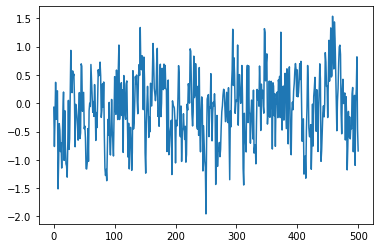

In [3]:
plt.plot(data)

# a

Find the orderpand fit the parameters: $\beta_i(i= 1,...,p)$, $\alpha_0$ using the linear regression method. In order to find $p$ and the best fit use the "AIC" and "BIC" criteria.

In [4]:
def dividing_data_into_subseries_II(data, k=2):
    X = []
    Y = []
    for i in range(len(data)-k):
        tmp = []
        for j in range(k):
            tmp.append(data[j+i])
        X.append(tmp)
        Y.append(data[k+i] )
    
    return np.array(X), np.array(Y)

###  Akaike information criterion (AIC)

$$  \mathrm {AIC} =  N \cdot \ln\left( \frac{\sum_{i=1}^N \epsilon^2}{N}\right) + 2k $$

where:
* $N = T-k$ - lenght of data series
* $k$ - number of parameters / $\beta_i$ ceofficients
* $\epsilon_i = (y_t-\hat{y_t})^2$


### Bayesian information criterion (BIC)

$$  \mathrm {BIC} =  N \cdot \ln\left( \frac{\sum_{i=1}^N \epsilon^2}{N}\right) + \ln(N)\cdot k $$

where:
* $N = T-k$ - lenght of data series
* $k$ - number of parameters / $\beta_i$ ceofficients
* $\epsilon_i = (y_t-\hat{y_t})^2$

In [5]:
alpha_tab = []
AIC_tab = []
BIC_tab = []

for k in range(1,10):
    X,Y = dividing_data_into_subseries_II(data, k=k)
    reg = LinearRegression(fit_intercept = False).fit(X, Y)
    prediction = reg.predict(X)
    N = len(X)
    
    alpha = np.sqrt(1/len(X)*sum((prediction - Y)**2))
    alpha_tab.append(alpha)
   
    AIC = N* np.log( sum( (Y-prediction)**2)/N) + 2*k
    AIC_tab.append(AIC)
    
    BIC = N*np.log(((Y-prediction)**2).mean()) + np.log(N)*k
    BIC_tab.append(BIC)
    
    print("k = {:}, alpha = {:}\t AIC = {:}\t BIC = {:}\n".format(k, alpha, AIC, BIC))

k = 1, alpha = 0.5098213793872195	 AIC = -671.6948511065393	 BIC = -667.4802430081169

k = 2, alpha = 0.5089534806801068	 AIC = -670.0478628437139	 BIC = -661.6226506522112

k = 3, alpha = 0.49730099043593373	 AIC = -689.7655823502289	 BIC = -677.133782119155

k = 4, alpha = 0.497358470939916	 AIC = -686.2535779182602	 BIC = -669.4192178138736

k = 5, alpha = 0.4975269543361798	 AIC = -682.5206999266912	 BIC = -661.4878202930672

k = 6, alpha = 0.4976581485857435	 AIC = -678.8634674312794	 BIC = -653.6361208558675

k = 7, alpha = 0.4980495877486443	 AIC = -674.6909655247008	 BIC = -645.273216904385

k = 8, alpha = 0.4932606726330802	 AIC = -680.8234519856328	 BIC = -647.2193785932913

k = 9, alpha = 0.49347956141858257	 AIC = -676.9734551469284	 BIC = -639.1871466984973



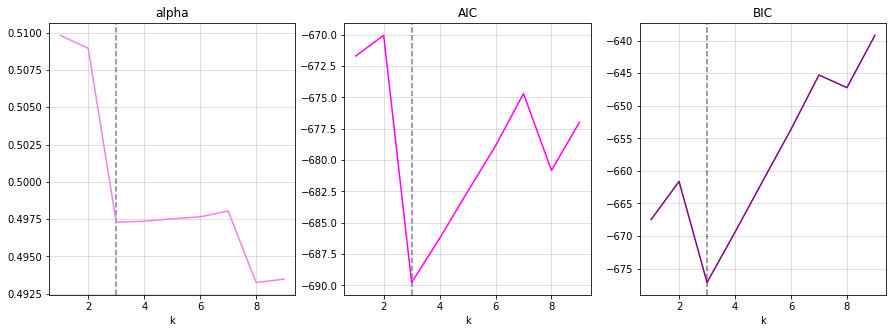

In [6]:
k_tab = list(range(1,10))

fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (15,5))

for ax in axs:
    ax.set_xlabel('k')
    ax.grid(True, alpha = 0.5)
    ax.axvline(x=3, color = 'black', alpha = 0.5, ls = '--')
    
axs[0].set_title('alpha')
axs[1].set_title('AIC')
axs[2].set_title('BIC')
    
axs[0].plot(k_tab, alpha_tab, color = 'violet')
axs[1].plot(k_tab, AIC_tab, color = 'fuchsia')
axs[2].plot(k_tab, BIC_tab, color = 'purple')

### Best prediction: k=3

In [7]:
AIC_index= AIC_tab.index(min(AIC_tab))
BIC_index= BIC_tab.index(min(BIC_tab))

AIC_best = AIC_tab[AIC_index]
BIC_best = BIC_tab[BIC_index]

print("best AIC: k = {:}\t AIC = {:}".format(AIC_index+1, AIC_best))
print("best BIC: k = {:}\t BIC = {:}".format(BIC_index+1, BIC_best))

best AIC: k = 3	 AIC = -689.7655823502289
best BIC: k = 3	 BIC = -677.133782119155


In [8]:
k=3

X,Y = dividing_data_into_subseries_II(data, k=k)
reg = LinearRegression(fit_intercept=False).fit(X, Y)
prediction = reg.predict(X)
N = len(X)

alpha = np.sqrt(((prediction - Y)**2).mean())
AIC = N*np.log(((Y-prediction)**2).mean()) + 2*k   
BIC = N*np.log(((Y-prediction)**2).mean()) + np.log(N)*k   
print("k = {:}, alpha = {:}\t AIC = {:}\t BIC = {:}\n".format(k, alpha, AIC, BIC))
print("model parameters: intercept: {:} coefficients: {:}".format(reg.intercept_, reg.coef_))

k = 3, alpha = 0.49730099043593373	 AIC = -689.7655823502289	 BIC = -677.133782119155

model parameters: intercept: 0.0 coefficients: [ 0.21790417 -0.0712842   0.48597427]


# b)

Compute  the  sample autocorrelation function (SACF, $\rho(t)$ and the sample partial autocorrelation function (SPACF,$\phi(t)$) and plot them for $t= 1,...10$. Based on the plot of SPACF check the orderp (on the plot include Gaussian N(0,(T−t)−1) bands for $95\%$ confidence level to check when SPACF becomes statistically zero).

In [9]:
def dividing_data_into_subseries(data, k=2):
    data_k = []
    for i in range(len(data)-k):
        tmp = [ ]
        for j in range(k):
            tmp.append(data[j+i])
        tmp.append(data[k+i])
        data_k.append(tmp)
    
    return np.array(data_k).T

In [10]:
def get_autocorrelation_coeff(data, delta):
    
    data_k = dividing_data_into_subseries(data, k=delta)  
    denominator = (data**2).mean()
    nominator = (data_k[0]*data_k[-1]).mean()
    
    return nominator/denominator
    

In [11]:
def get_autocorrelation(p,data):
    
    autocorrelation_tab = []

    for delta in range(1,p+1):
        autocorrelation = get_autocorrelation_coeff(data, delta)
        autocorrelation_tab.append(autocorrelation)
    
    return autocorrelation_tab

### sample autocorrelation function (SACF)

Δt = 1	 ρ(Δt)=0.512124
Δt = 2	 ρ(Δt)=0.288868
Δt = 3	 ρ(Δt)=0.323168
Δt = 4	 ρ(Δt)=0.255728
Δt = 5	 ρ(Δt)=0.153287
Δt = 6	 ρ(Δt)=0.124052
Δt = 7	 ρ(Δt)=0.092280
Δt = 8	 ρ(Δt)=0.083226
Δt = 9	 ρ(Δt)=0.079486
Δt = 10	 ρ(Δt)=0.091703


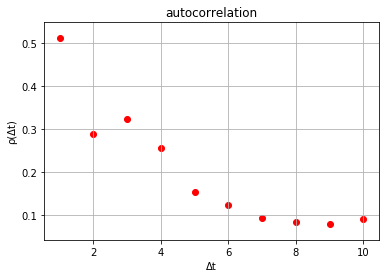

In [12]:
p=10
p_tab = list(range(1,p+1))
autocorrelation_tab = get_autocorrelation(p,data)

for delta_t, corr in zip(p_tab, autocorrelation_tab):
    print(u'\u0394t = {:}\t \u03C1(\u0394t)={:2f}'.format(delta_t,corr ))

plt.title('autocorrelation')
plt.scatter(p_tab, autocorrelation_tab, color ='red')  
plt.ylabel(u'\u03C1(\u0394t)')
plt.xlabel(u'\u0394t')
plt.grid()

###  Partial autocorrelation function (PACF)

In [13]:
def get_partial_autocorrelation(p, data):
    
    autocorrelation_tab = get_autocorrelation(p,data)
    
    M = np.identity(p)*0.5
    for i in range(p):
        for j in range(i+1, p):
            M[i][j] = autocorrelation_tab[j-i-1]
    
    A = np.matrix(M.T + M)
    A_inv = np.linalg.inv(A) 
    
    psi_vec = np.array(np.dot(A_inv,autocorrelation_tab))[0]
    
    return psi_vec[-1]

In [1]:
p=10
p_tab = list(range(1,p+1))
partial_corr_tab_tab = []

for k in range(1,p+1):
    partial_corr_tab_tab.append(get_partial_autocorrelation(k,data))


for delta_t, p_corr in zip(p_tab, partial_corr_tab_tab):
    print(u'\u0394t = {:}\t \u03A6(\u0394t)={:2f}'.format(delta_t, p_corr ))

N = 490
confidence_level = 1.96/np.sqrt(N)
N= 500
confidence_level_II = 1.96/np.sqrt(N)

    
plt.title('partial autocorrelation')
plt.scatter(p_tab, partial_corr_tab_tab, color ='red')  
plt.ylabel(u'\u03A6(\u0394t)')
plt.xlabel(u'\u0394t')
plt.hlines(y = confidence_level, xmin=0, xmax = p+1, linestyles='dashed', color = 'black', alpha = 0.5)
plt.hlines(y = confidence_level_II, xmin=0, xmax = p+1, linestyles='dashed', color = 'black', alpha = 0.5)

plt.grid()

NameError: name 'get_partial_autocorrelation' is not defined

Based on the above plot, with confidence level 95%, we may determinate k = 3. The corellation at Δt = 2 is quite small, but the result agrees with the results obtained in a).



# c)
###  Autocorrelation matrix  and  Yule Walker Equations


For the order $p$ established in (b) fit the parameters: $\beta_i (i=1,...,p)$ and $\alpha_0$ using the Yule-Walkermethod (in the matrix form).

In [15]:
k=3
autocorrelation_tab = get_autocorrelation(3,data)

M = np.identity(k)*0.5
for i in range(k):
    for j in range(i+1, k):
        M[i][j] = autocorrelation_tab[j-i-1]
        
A = np.matrix(M.T + M)
A_inv = np.linalg.inv(A) 
beta_vec = np.array(np.dot(A_inv, autocorrelation_tab))[0]
beta_vec ## beta1, beta2, beta3

array([ 0.48572791, -0.07255982,  0.22001576])

$$\hat{\alpha_0}^2 = (1- \rho^T \hat{A}^{-1}\rho)\cdot \frac{1}{T}\sum_{t=1}^{T}y_t^2 $$

In [16]:
alpha_0 = np.sqrt(float((1-np.dot( np.dot(A_inv, autocorrelation_tab), autocorrelation_tab))*(data**2).mean()))
alpha_0

0.4965234301264099

# d) 

Using the data and the fit of point  (a)  and/or  (c)  compute  the empirical noise 

$$ \hat{\eta}(t) = \frac{y_t - \hat{y_t}}{\alpha_0}$$ and check  if  it  has  standard  Gaussian N(0,1)  distribution  (use  e.g.Kolmogorov-Smirnov test).

In [17]:
## Based on results in a:
coeff_a = np.array([ 0.48597427, -0.0712842,  0.21790417])
alpha_0a = 0.4973009904359337

## Based on results in c:
coeff_c = np.array([ 0.48572791, -0.07255982,  0.22001576])
alpha_0c = 0.4965234301264099

In [18]:
df= pd.DataFrame(dividing_data_into_subseries(data, k=3).transpose(), columns=['t0','t1','t2','t3'])
df


,t0,t1,t2,t3
0,-0.071753,-0.764857,-0.255960,0.369323
1,-0.764857,-0.255960,0.369323,-0.282561
2,-0.255960,0.369323,-0.282561,0.191984
3,0.369323,-0.282561,0.191984,0.218465
4,-0.282561,0.191984,0.218465,-1.514103
...,...,...,...,...
493,-0.403822,0.138601,-1.097626,0.037099
494,0.138601,-1.097626,0.037099,0.251938
495,-1.097626,0.037099,0.251938,0.819219
496,0.037099,0.251938,0.819219,-0.459295


### empirical noise for coeffs from c

In [19]:
df['prediction_a'] = coeff_a[0]*df['t1'] + coeff_a[1]*df['t2'] + coeff_a[2]*df['t3'] + alpha_0a
df['empirical_noise_a'] = df['t0'] - df['prediction_a']//alpha_0a

df['prediction_c'] = coeff_c[0]*df['t1'] + coeff_c[1]*df['t2'] + coeff_c[2]*df['t3'] + alpha_0c
df['empirical_noise_c'] = (df['t0'] - df['prediction_c'])/alpha_0c
df

,t0,t1,t2,t3,prediction_a,empirical_noise_a,prediction_c,empirical_noise_c
0,-0.071753,-0.764857,-0.255960,0.369323,0.224323,-0.071753,0.224840,-0.597339
1,-0.764857,-0.255960,0.369323,-0.282561,0.285013,-0.764857,0.283231,-2.110852
2,-0.255960,0.369323,-0.282561,0.191984,0.738759,-1.255960,0.738656,-2.003160
3,0.369323,-0.282561,0.191984,0.218465,0.393903,0.369323,0.393411,-0.048514
4,-0.282561,0.191984,0.218465,-1.514103,0.245098,-0.282561,0.240797,-1.054046
...,...,...,...,...,...,...,...,...
493,-0.403822,0.138601,-1.097626,0.037099,0.650985,-1.403822,0.651652,-2.125728
494,0.138601,-1.097626,0.037099,0.251938,0.016137,0.138601,0.016114,0.246689
495,-1.097626,0.037099,0.251938,0.819219,0.675882,-2.097626,0.676504,-3.573104
496,0.037099,0.251938,0.819219,-0.459295,0.461256,0.037099,0.458402,-0.848505


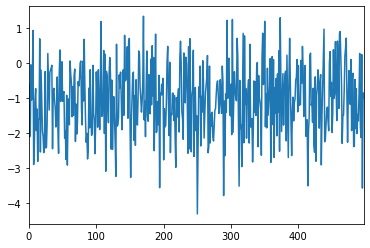

In [20]:
df['empirical_noise_c'].plot()

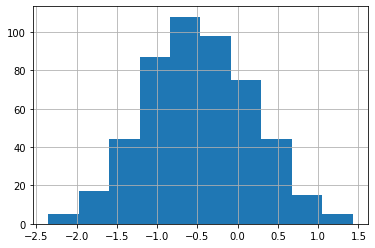

In [21]:
df['empirical_noise_a'].hist()

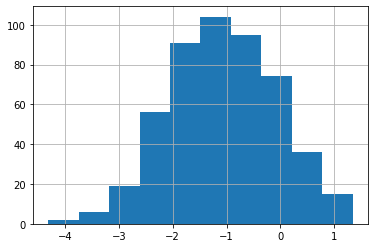

In [22]:
df['empirical_noise_c'].hist()

In [23]:
empirical_noise = np.array(df['empirical_noise_a'])

In [24]:
from scipy.stats import norm, kstest

D_N, p_value = kstest(empirical_noise, 'norm', args=(0,1))

print("data a: test statistic: D_N = {:},  p-value = {:}".format(D_N, p_value) )

data a: test statistic: D_N = 0.28029848766041887,  p-value = 4.2584860993779997e-35


# e) 

Using the fit of point (a) and/or (c) simulate $N=100$  future(forecast) paths for $t=T+1,T+2,...,T+10$. Using the generated forecast paths estimate  the  mean  value $<y(t)>$ and the standard deviation $\sigma(y(t))$ of $y(t)$ for each future $t=T+ 1,T+ 2,T+ 10$ and plot them as the continuation of the sample data series (plot of mean with error bars of standard deviation).